# 1. Problema del sub-arreglo máximo
Consiste en que, teniendo un arreglo de N elementos, descubrir el subarreglo contiguo en el que la suma de sus elementos de el valor más alto.

Un ejemplo de su uso, es que, asumiendo que sabemos lo que pasará en el futuro, saber cuál es el mejor momento para comparar y vender acciones de una empresa, debido a su cambio de valor.

Por lo tanto:
**Entrada**: arreglo de n elementos $[a_1,a_2,...,a_n]$.

**Salida**: Sub-arreglo $[a_i,...,aj]$, tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits{k=i}^j ak \geq \sum\limits{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$.

# 2.1 Código

In [27]:
#implementar función MaxSubArrayMid
#Esta función encuentra el sub-arreglo máximo de un arreglo que contenga el elemento mid.
#recordar incluir verbose

def MaxSubArray (arr , low , high , recursiones = 0, verbose = False):
  if verbose == True:
    print("Cantidad de Recursiones: ", recursiones)
    print("Low actual: ", low, "\nHigh actual: ", high)
    print("Arreglo de entrada: ", arr[low:(high+1)])

  if low == high:
      if verbose == True:
        print("Arreglo es de largo 1")

      return arr[low], recursiones, low, high


  #Se saca la mitad del arreglo, como las posiciones funcionan en base a enteros se usa el (int)
  mid = (int)((high + low)/2)
  if verbose == True:
    print("mid = ", mid)

  #Se revisa el lado izquierdo del arreglo y se le suma en uno a la cantidad de recursiones
  recursiones += 1
  izqLow = izqHigh = 0
  if verbose == True:
    print("\nRevisando lado izquierdo del arreglo")
  sumLeft, recursiones, izqLow, izqHigh = MaxSubArray(arr, low, mid, recursiones, verbose)
  #se sacan los índices del subarreglo del lado izquierdo
  if verbose == True:
    print("La suma del lado izquierdo es: ", sumLeft)

  #Se revisa el lado derecho del arreglo y se le suma en uno a la cantidad de recursiones
  recursiones += 1
  if verbose == True:
    print("\nRevisando lado derecho del arreglo")
  derLow = derHigh = 0
  sumRight, recursiones, derLow, derHigh = MaxSubArray(arr, mid+1, high, recursiones, verbose)
  #se sacan los índices del subarreglo del lado derecho
  if verbose == True:
    print("Right =", sumRight)

  #Se obtiene el subarreglo que contenga a los elementos de en medio con la suma más alta posible
  #junto con sus índices correspondientes
  sumMid, midLow, midHigh = MaxSubArrayMid(arr, low, mid, high, verbose)

  # Return
  if sumLeft > sumRight and sumLeft > sumMid:
    return sumLeft, recursiones, izqLow, izqHigh

  elif sumRight > sumLeft and sumRight > sumMid:
    return sumRight, recursiones, derLow, derHigh

  else:
    if verbose == True:
      print("se retorna : ",sumMid,midLow,midHigh)
    return sumMid, recursiones, midLow, midHigh
  return


def MaxSubArrayMid (arr , low , mid , high , verbose = False):
  #se declaran las variables que marcarán el inicio y el final del subarreglo

  #lado izquierdo
  #Se revisa cuál es la suma más grande posible yendo desde la mitad hacia la izquierda
  sumaIzquierdaFinal = arr[mid]
  sumaActualIzq = 0
  finalLow = mid

  #if verbose == True:
    #print("suma izquierda = ", sumaActualIzq)
    #print("sumaIzquierdaFinal = ", sumaIzquierdaFinal)
  for i in range(mid, low-1, -1):
      sumaActualIzq += arr[i]
      if (sumaActualIzq > sumaIzquierdaFinal):
        sumaIzquierdaFinal = sumaActualIzq
        finalLow = i
  
  if verbose == True:
    print("La suma del lado izquierdo = ", sumaIzquierdaFinal)
    print("La posición en la que empezará el subarreglo es = ", finalLow)


  #lado derecho
  #se sigue la misma idea que con el lado izquierdo
  sumaDerechaFinal = arr[mid + 1]
  sumaActualDer = 0
  finalHigh = mid + 1

  #if verbose == True:
    #print("\nsuma derecha = ", sumaActualDer)

  for j in range(mid + 1, high + 1, +1):
      sumaActualDer += arr[j]
      if (sumaActualDer > sumaDerechaFinal):
        sumaDerechaFinal = sumaActualDer
        finalHigh = j

  #print("se suman: ", sumaIzquierdaFinal, sumaDerechaFinal)
  middle = sumaIzquierdaFinal + sumaDerechaFinal
  #print("el resultado final de la funcion maxsubarraymid es: ", middle)

  return middle, finalLow, finalHigh
   
  
arr = [3,-2,4,-5]
sumFinal = recursiones = 0
a = b = 0
sumFinal, recursiones,a,b = MaxSubArray (arr, 0, len(arr)-1, recursiones, False)
print("la suma final es de: ", sumFinal)
print("las posiciones que se sacaron son: ",a," y ", b)
print("el arreglo final es: ", arr[a:b+1])
print("se hicieron", recursiones,"recursiones")

la suma final es de:  5
las posiciones que se sacaron son:  0  y  2
el arreglo final es:  [3, -2, 4]
se hicieron 6 recursiones


# 2.1 Descripción del algoritmo
Explicar las entradas y salidas esperadas
hacer referencia a las partes más importantes del
código

Se reciben como entradas el arreglo (arr), las posiciones de inicio (low) y final (high) de este y la cantidad de recursiones.

Pasos que sigue el algoritmo:

1. Revisa si el algoritmo es de largo 1, en caso de ser así retorna, el elemento que tenga, junto con las posiciones que le corresponden y el contador de recursiones.

2. En caso de no ser así, se llamará a si misma para repetir el proceso con el lado izquierdo y derecho del arreglo.

3. Luego llama a la función MaxSubArrayMid para buscar el subarreglo que dé la mayor suma y que pase por el centro del arreglo (o subarreglo en caso de que esté operando bajo una de las recursiones).

4. Una vez que se ha encontrado el subarreglo que queríamos la función retorna la suma de los elementos, el contador de recursiones y las posiciones que forman el subarreglo.

#2.2 Ejemplo

Consideremos el arreglo: $a = [3,-2,4,-5]$

Primero se revisa si el arreglo es de largo 1, al no ser así se pasa a los pasos siguientes.

Ahora la función se llamará a sí misma para revisar las partes izquierdas y derechas del arreglo, que llamaremos ramaIzquierda y ramaDerecha.
#ramaIzquierda
Para la ramaIzquierda, se llamará a la funcion maxSubArray para el subarreglo $[3,-2]$. Como su largo es mayor a 1, se vuelve a llamar a la función maxSubArray para los lados izquierdos y derechos de este subarreglo, como en ambos casos los subarreglos son de largo 1, la función retornará los subarreglos $[3]$ y $[-2]$

Ahora que se terminó de llamar a los dos **MaxSubArray** para ambos lados, buscaremos el subarreglo que contenga la suma más grande y que contenga al centro del arreglo.

Y al recorrer la parte izquierda tenemos $[3]$ y en la parte derecha tenemos $[-2]$ y como esta es nuestra única opción, tenemos que la suma más grande que un subarreglo puede tener incluyendo el centro es de $1$.

Luego comparamos los tres resultados y al final tenemos que la suma mayor de la rama izquierda del arreglo mayor es 3.

#ramaDerecha
Se repite el mismo proceso que con la anterior, llamamos a la función **maxSubArray** para los subarreglos $[4]$ y $[-5]$ y como estos son de largo 1, los retorna.

Una vez que terminamos con eso buscamos nuevamente al subarreglo que de la suma más alta y contenga al centro, y nos da que ese sería el $[4,-5]$ con una suma de 1. Luego se comparan los resultados obtenidos y tenemos que la suma mayor es de 4.


#Arreglo mayor que incluya el centro
Una vez que terminamos de ver las ramas izquierdas y derechas del arreglo pasamos a revisar el arreglo que contenga al centro y de la mayor suma posible.

Por lo que revisamos el sub-arreglo izquierdo $a[low:mid]$ = $[3,-2]$ guardando su suma más alta que es $3 - 2 = 1$. Luego vemos el derecho $a[mid+1:high] = [4,-5]$ y tenemos que la suma más alta es de $4$. Cuando sumamos ambos resultados tenemos una suma de $5$.

#Comparación final
Ahora comparamos los resultados y tenemos que:
$Izquierda = 1$

$Derecha = -1$

$Centro = 5$

Por lo que retornamos el valor $5$ y los índices $0$ y $2$ que corresponden al subarreglo $[3,-2,4]$ y el contador de recursiones, con esto el algoritmo se termina.







#2.3 Ejecución Paso a Paso (verbose = True)

In [14]:
arr = [3,-2,4,-5]
sumFinal = recursiones = 0
a = b = 0
sumFinal, recursiones,a,b = MaxSubArray (arr, 0, len(arr)-1, recursiones, True)
print("la suma final es de: ", sumFinal)
print("las posiciones que se sacaron son: ",a," y ", b)
print("el arreglo final es: ", arr[a:b+1])

Cantidad de Recursiones:  0
Low actual:  0 
High actual:  3
Arreglo de entrada:  [3, -2, 4, -5]
mid =  1

Revisando lado izquierdo del arreglo
Cantidad de Recursiones:  0
Low actual:  0 
High actual:  1
Arreglo de entrada:  [3, -2]
mid =  0

Revisando lado izquierdo del arreglo
Cantidad de Recursiones:  0
Low actual:  0 
High actual:  0
Arreglo de entrada:  [3]
Arreglo es de largo 1
La suma del lado izquierdo es:  3

Revisando lado derecho del arreglo
Cantidad de Recursiones:  0
Low actual:  1 
High actual:  1
Arreglo de entrada:  [-2]
Arreglo es de largo 1
Right = -2
La suma del lado izquierdo =  3
La posición en la que empezará el subarreglo es =  0
La suma del lado izquierdo es:  3

Revisando lado derecho del arreglo
Cantidad de Recursiones:  0
Low actual:  2 
High actual:  3
Arreglo de entrada:  [4, -5]
mid =  2

Revisando lado izquierdo del arreglo
Cantidad de Recursiones:  0
Low actual:  2 
High actual:  2
Arreglo de entrada:  [4]
Arreglo es de largo 1
La suma del lado izquierdo 

# 3. Análisis de tiempo de ejecución
El algoritmo **MaxSubArray** tiene un tiempo de ejecución **tiempo de ejecución** $O(n*log(n))$ en el peor caso.

##Prueba de teorema
Para comprobar esto usaremos el **Teorema Maestro**, pero para esto tenemos que sacar la fórmula de recurrencia.

###Fórmula de Recurrencia
La fórmula de recurrencia **T(n)** del algoritmo se obtiene analizando sus partes.

Caso base: Cuando $n = 1$, el algoritmo pregunta si el arreglo es de largo $1$, si lo es, retorna los valores sin usar ninguna recursion. Por lo tanto tenemos que $T(n) = O(1)$ si $n = 1$.

Resto de casos: El algoritmo divide el problema en dos ($n/2$) y resolverá los sub-problemas por separado tardando $2T(n/2)$ en resolverlos. Luego el algoritmo busca el máximo subarreglo que contenga el centro, operación que tiene una complejidad de $O(n)$.

Por lo que con esto, obtenemos que $T(n) = 2T(n/2) + O(n)$.

###Teorema Maestro
Usando el teorema maestro, podemos obtener la complejidad temporal del algoritmo:
$T(n) \leq aT(n/b)+O(n^d)$ donde $a=2$, $b=2$ y $d=1$. Ya que $2 = 2^1$, por lo que la complejidad temporal sería $O(n*log(n))$.

# 4. Demostración de Correctitud para MaxSubArrayMid

MaxSubArrayMid encuentra la mayor suma posible de un subarreglo que contenga los elementos $mid$ y $mid + 1$. Esta función recibe el arreglo $arr$, y los índices $low$, $mid$ y $high$ que serán los índices que limitarán el espacio en el que vamos a operar.

##Lado Izquierdo

Revisamos lo que hay entre $arr[mid]$ y $arr[low]$. En este proceso sumaIzquierdaFinal contiene la mayor suma a la que se ha llegado, finalLow el índice al que se llegó a ese resultado y sumaActualIzq la suma resultante de la última iteración.

Al principio sumaIzquierdaFinal contiene la mayor suma que hay entre $arr[mid]$ y $arr[mid]$, ya que vamos de derecha a izquierda, en la siguiente iteración del ciclo sumamos $arr[mid-1]$ a sumaActualIzq, y si sumaActualIzq es mayor que sumaIzquierdaFinal, actualizamos el valor de sumaIzquierda final al que corresponde y actualizamos el índice al que se llegó para conseguir dicho resultado, en este momento sumaIzquierdaFinal contiene la suma más grande entre $arr[mid]$ y $arr[mid-1]$. 

Ahora repetiremos el proceso hasta llegar al final, en ese momento tendremos el subarreglo que contenga la mayor suma entre $arr[mid]$ y $arr[low]$.

##Lado Derecho

Revisamos lo que hay entre $arr[mid+1]$ y $arr[high]$ (con $n$ siendo la última casilla). En este proceso sumaDerechaFinal contiene la mayor suma a la que se ha llegado, finalHigh el índice al que se llegó a ese resultado y sumaActualDer la suma resultante de la última iteración.

El resto del proceso en básicamente un espejo del anterior pero aplicado desde $arr[mid+1]$ hasta $arr[high]$.

Por lo que al final de este tendremos el subarreglo que contiene la mayor suma de la parte derecha del arreglo y que contenga a uno de los elementos centrales de este.

##Paso final

Al final tendremos los índices del subarreglo que contenga la mayor suma y que pase por en medio del arreglo en finalLow y finalHigh. Y la suma que estábamos buscando que es el resultado de sumaIzquierdaFinal y sumaDerechaFinal.

# 5. Demostración de correctitud por Inducción para MaxSubArray

Caso base $(n = 1)$: Cuando el largo del algoritmo es 1, y queremos conseguir la mayor suma de elementos consecutivos. La respuesta es el mismo elemento del arreglo.

Resto de casos: Asumimos que el algoritmo entregará la respuesta correcta para cualquier arreglo de largo $n \geq 1$. Este algoritmo tiene 3 pasos, uno en el que se llama a sí mismo para buscar la respuesta en en lado izquierdo del arreglo, otro para el lado derecho. Y la llamada a MaxSubArrayMid que lo busca para un arreglo que pasar por el medio, asumiremos que este algoritmo encontrará el valor de la mayor suma del subarreglo que pasa por el medio.

Pasos 1 y 2: el propósito de estas llamadas, son para encontrar los subarreglos que posean las mayores sumas de los lados izquierdos y derechos del algoritmo, por la hipótesis inductivas sabemos que esta llamada encontrará y retornará el valor de la suma y los índices de los subarreglos para los lados izquierdos y derechos.

Paso 3: se llama a la función MaxSubArrayMid, que busca la mayor suma que puede tener un subarreglo que pase por el medio del arreglo. Asumimos que entregará la respuesta correcta.

Ahora tenemos tres posibles respuestas, que compararemos para retornar el valor que corresponda.

# 6. Experimentos

# 6.1 Comparación con MaxSubArray implementado con Kadane


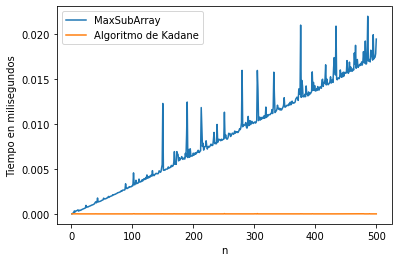

In [13]:
import datetime
import random
from timeit import repeat
from sys import maxsize
import matplotlib.pyplot as plt

def kadane(a):
       
    max_so_far = -maxsize - 1
    max_ending_here = 0
       
    for i in range(0, len(a)):
        max_ending_here = max_ending_here + a[i]
        if (max_so_far < max_ending_here):
            max_so_far = max_ending_here
  
        if max_ending_here < 0:
            max_ending_here = 0
    return max_so_far

x=[];
y=[];
yb=[];

for n in range(1,501):
  a = random.sample(range(1, 1000), n)
  x.append(n)
  aux = 0

  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a}, 0, len({a})-1,{aux})", repeat=1, number=10)
  y.append(t)
  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({arr})", repeat=1, number=10)
  yb.append(t)

plt.plot(x,y)
plt.plot(x,yb)
plt.legend(["MaxSubArray", "Algoritmo de Kadane"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

# 6.2 Cantidad de recursiones

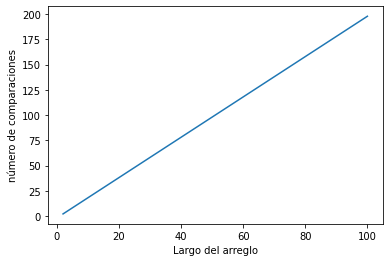

In [28]:
import random
import matplotlib.pyplot as plt

x=[];
y=[];

for n in range(2,101):
  arr = random.sample(range(-50, 50), n)
  x.append(n)
  suma = low = high = recursiones = 0
  suma, recursiones, low, high = MaxSubArray(arr, 0, (len(arr)-1), recursiones, False)
  y.append(recursiones)

plt.plot(x,y)

plt.xlabel('Largo del arreglo')
plt.ylabel('número de comparaciones')
plt.show()

# 6.3 Análisis de los resultados obtenidos

##Primer Experimento
En la gráfica que obtenemos se puede ver que el algoritmo de kadane es mucho más rápido que el MaxSubArray, los motivos de esto serían la complejidad temporal, que en kadane $O(n)$ y en MaxSubArray es $O(nlogn)$. Pero otra que me llamó la atención es que en Python las recursiones son muy caras en temas de tiempo, y debido a que MaxSubArray se llama a sí misma dos veces cada vez que se usa, el tiempo que tarda en acabarse se dispara.

##Segundo Experimento

Este consistió en ver como evolucionaba la cantidad de recursiones dependiendo de la cantidad de elementos del arreglo, y aquí se puede ver que el crecimiento es lineal, lo que debe de ser debido a que la cantidad de recursiones depende únicamente de la cantidad de elementos que tenga el arreglo, y no de los "avances" que se hayan hecho para conseguir la respuesta esperada como podría pasar con un algoritmo de ordenamiento.